In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Anthony Bannerman\Documents\Codveda-Internship-Data-Science\Task_1_Data_Cleaning_Churn\churn_cleaned.csv")


In [9]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,408,0,0,0,184.5,97,31.37,351.6,80,...,False,False,False,False,False,False,False,False,False,False
1,65,415,0,0,0,129.1,137,21.95,228.5,83,...,False,False,False,False,False,False,False,False,False,False
2,161,415,0,0,0,332.9,67,56.59,317.8,97,...,False,False,False,False,False,False,False,False,False,False
3,111,415,0,0,0,110.4,103,18.77,137.3,102,...,False,False,False,False,False,False,False,False,False,False
4,49,510,0,0,0,119.3,117,20.28,215.1,109,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Account length           0
Area code                0
International plan       0
Voice mail plan          0
Number vmail messages    0
                        ..
State_VT                 0
State_WA                 0
State_WI                 0
State_WV                 0
State_WY                 0
Length: 69, dtype: int64

# Step 1 – Compute Summary Statistics

In [26]:
# Select numerical columns only
num_df = df.select_dtypes(include=['int64', 'float64'])

# Summary statistics
summary = num_df.describe().T
summary['median'] = num_df.median()
summary['variance'] = num_df.var()

summary


,count,mean,std,min,25%,50%,75%,max,median,variance
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00,102.00,1666.229962
Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00,415.00,1745.844551
International plan,667.0,0.079460,0.270659,0.00,0.00,0.00,0.000,1.00,0.00,0.073256
Voice mail plan,667.0,0.283358,0.450967,0.00,0.00,0.00,1.000,1.00,0.00,0.203371
Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00,0.00,195.845465
Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30,178.30,3081.207755
Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00,101.00,416.029062
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83,30.31,89.046843
Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80,203.70,2472.005659
Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00,101.00,359.036621


In [15]:
df.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,0.079460,0.283358,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718,0.142429
std,40.819480,41.783305,0.270659,0.450967,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357,0.349752
min,1.000000,408.000000,0.000000,0.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,0.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,102.000000,415.000000,0.000000,0.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000,0.000000
75%,128.000000,415.000000,0.000000,1.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000,0.000000
max,232.000000,510.000000,1.000000,1.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000,1.000000


# Step 2 – Visualize the Data

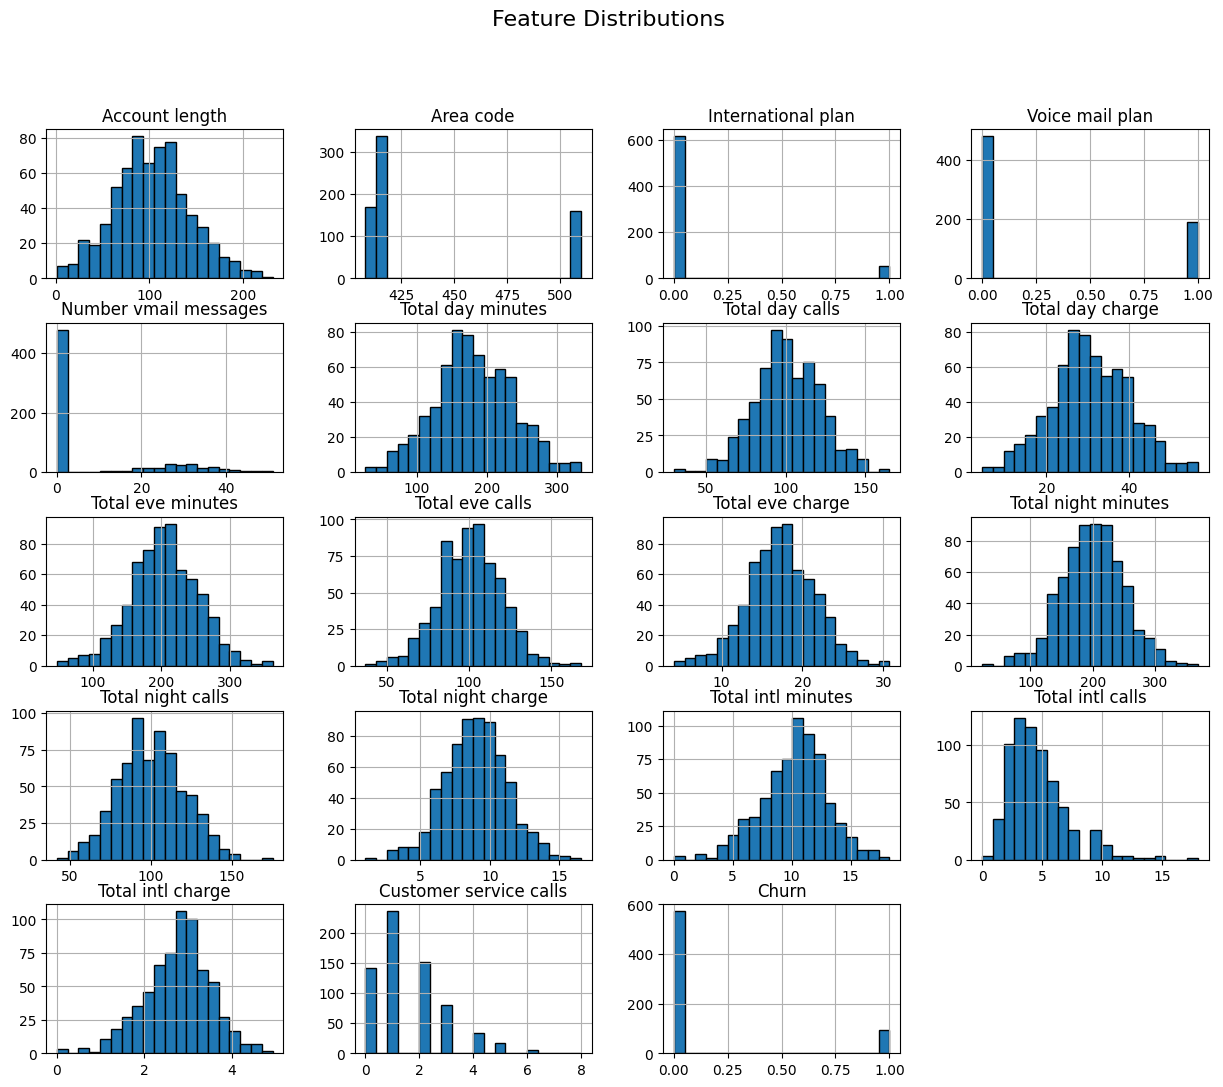

In [17]:
# Histograms (Distribution of features)
import matplotlib.pyplot as plt

df.hist(figsize=(15,12), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Box Plots (Outliers & spread)

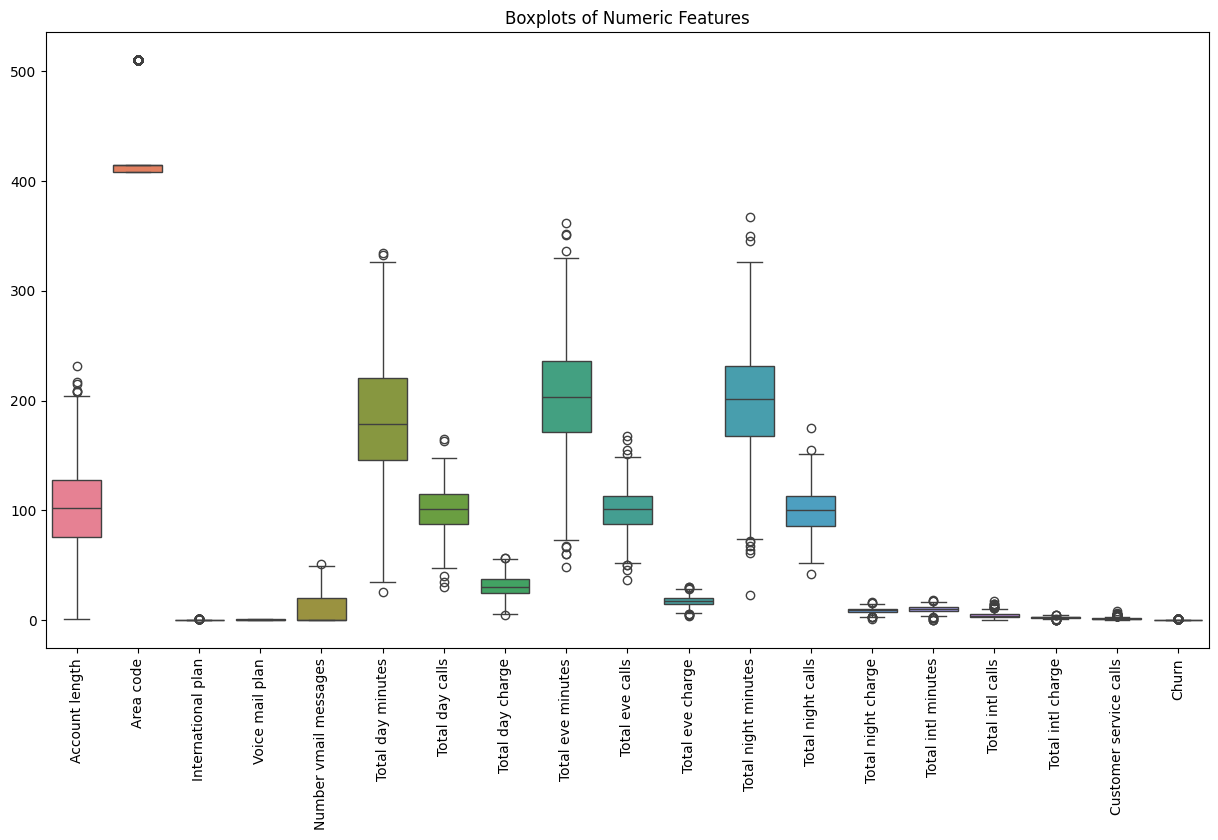

In [18]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Boxplots of Numeric Features')
plt.show()


# Scatter Plots (Feature relationships)

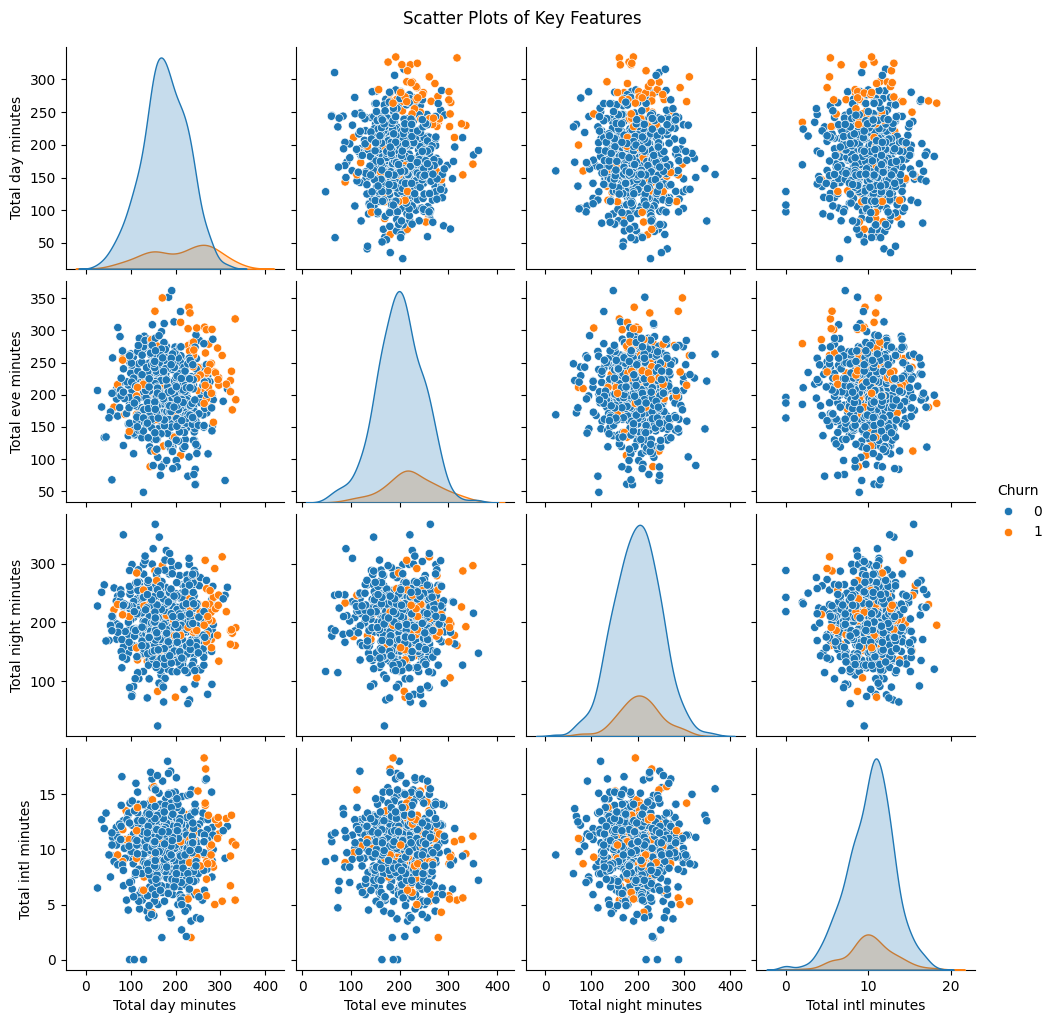

In [22]:
sns.pairplot(df, vars=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes' ,], hue='Churn')
plt.suptitle('Scatter Plots of Key Features', y=1.02)
plt.show()

# Step 3 – Correlation Analysis

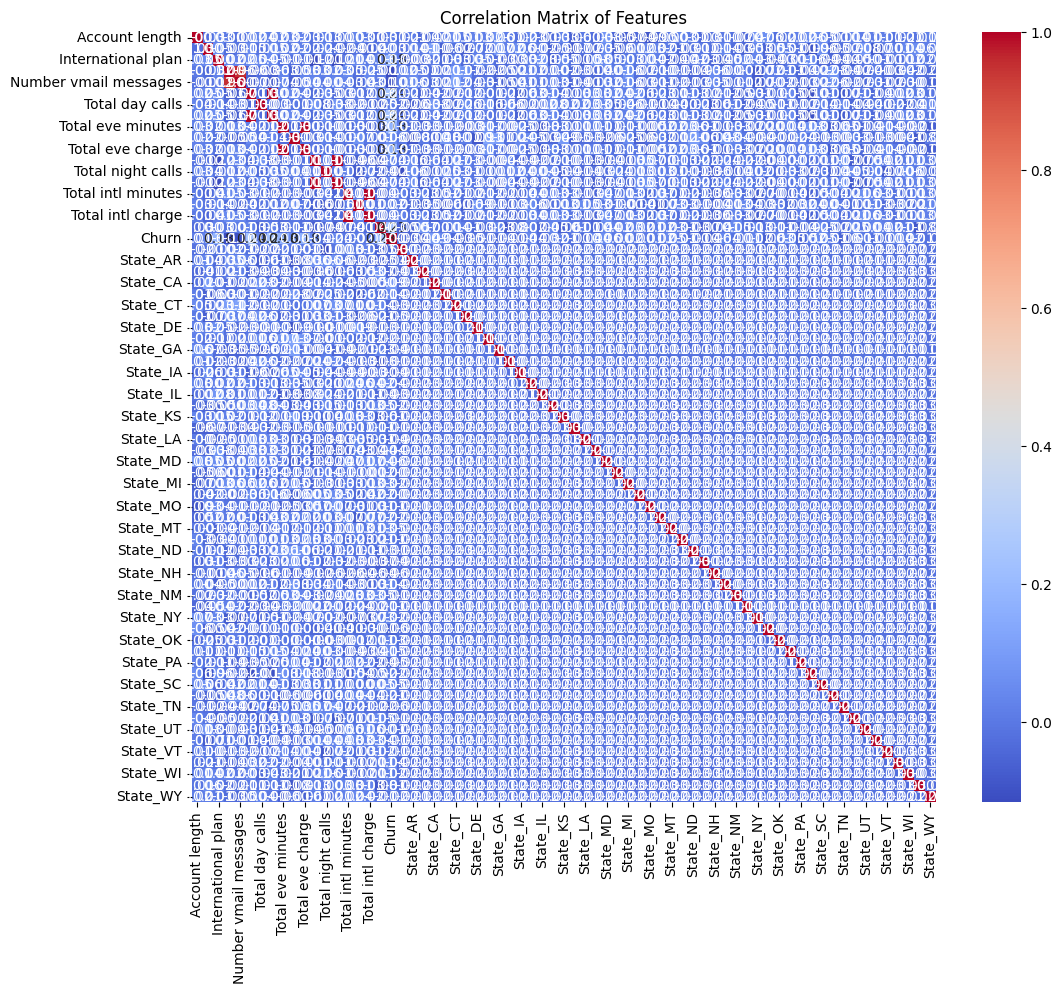

In [20]:
# Correlation Matrix (Numerical features)
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


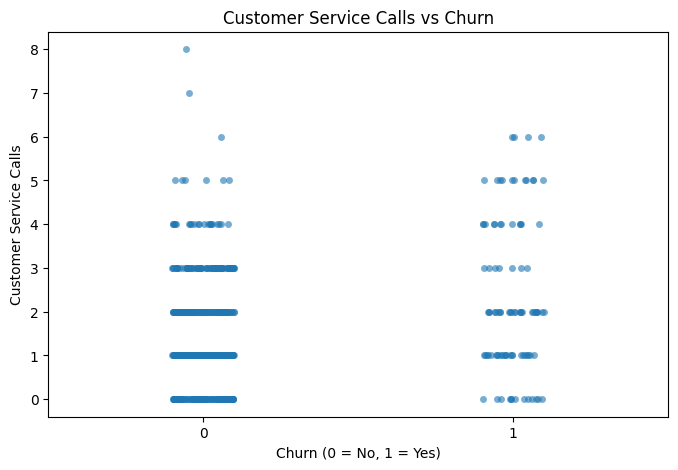

In [27]:
plt.figure(figsize=(8,5))
sns.stripplot(
    x='Churn',
    y='Customer service calls',
    data=df,
    jitter=True,
    alpha=0.6
)
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Customer Service Calls')
plt.show()


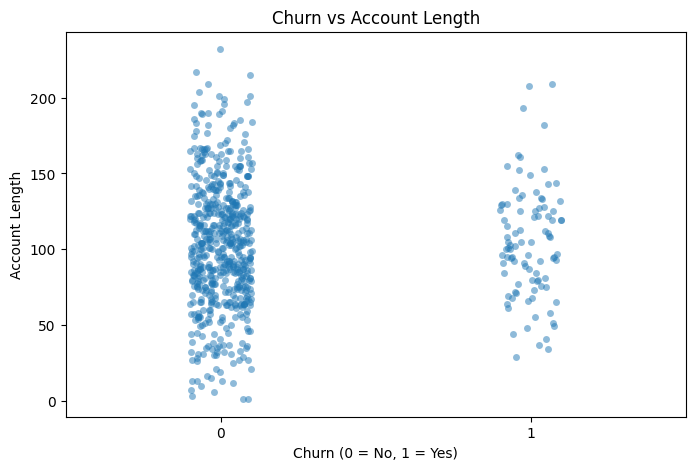

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.stripplot(
    x='Churn',
    y='Account length',
    data=df,
    jitter=True,
    alpha=0.5
)
plt.title('Churn vs Account Length')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Account Length')
plt.show()


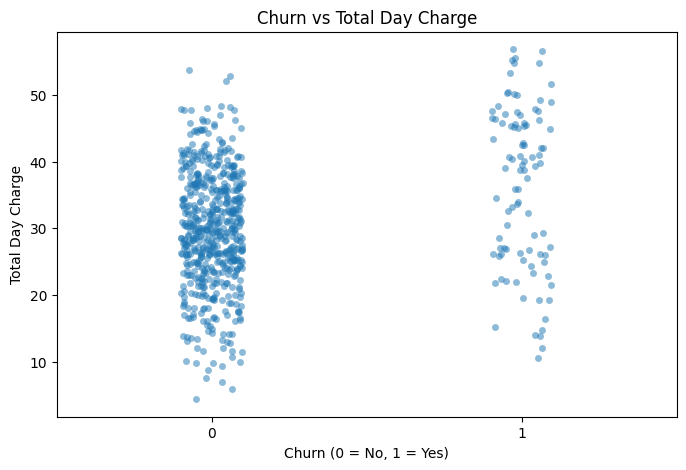

In [29]:
plt.figure(figsize=(8,5))
sns.stripplot(
    x='Churn',
    y='Total day charge',
    data=df,
    jitter=True,
    alpha=0.5
)
plt.title('Churn vs Total Day Charge')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total Day Charge')
plt.show()
